### Importación de datos



In [273]:
import pandas as pd

url = "./resources/tienda_1.csv"
url2 = "./resources/tienda_2.csv"
url3 = "./resources/tienda_3.csv"
url4 = "./resources/tienda_4.csv"

df_tiendas = {
    "Tienda 1": pd.read_csv(url),
    "Tienda 2": pd.read_csv(url2),
    "Tienda 3": pd.read_csv(url3),
    "Tienda 4": pd.read_csv(url4)
}

df_tiendas["Tienda 1"].head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [274]:
revenue_per_store = {key: values['Precio'].astype(float).sum() for i, (key, values) in enumerate(df_tiendas.items())}

In [275]:
for key, value in revenue_per_store.items():
    print(f"Ingresos de {key}: ${value}")
    
revenue_total = sum(revenue_per_store.values())
print(f"Ingresos totales: ${revenue_total}")

Ingresos de Tienda 1: $1150880400.0
Ingresos de Tienda 2: $1116343500.0
Ingresos de Tienda 3: $1098019600.0
Ingresos de Tienda 4: $1038375700.0
Ingresos totales: $4403619200.0


# 2. Ventas por categoría

#### En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [276]:

all_stores = []
for key, store in df_tiendas.items():
     grouped = store.groupby('Categoría del Producto')['Precio'].agg(['sum', 'count'])
     grouped['Tienda'] = key
     grouped = grouped.rename(columns={'sum': 'ingreso_total', 'count': 'cantidad_total'})
     grouped = grouped.reset_index()
     # grouped = grouped.set_index(key)
     all_stores.append(grouped)

df_resume_by_category = pd.concat(all_stores)

df_resume_by_category.sort_values(by=['Tienda','ingreso_total'], ascending=[True, False])
print('Resumen de total de ventas y cantidades para cada tienda')
print('='*100)
print(df_resume_by_category)

Resumen de total de ventas y cantidades para cada tienda
    Categoría del Producto  ingreso_total  cantidad_total    Tienda
0  Artículos para el hogar     12698400.0             171  Tienda 1
1     Deportes y diversión     39290000.0             284  Tienda 1
2        Electrodomésticos    363685200.0             312  Tienda 1
3             Electrónicos    429493500.0             448  Tienda 1
4   Instrumentos musicales     91299000.0             182  Tienda 1
5                 Juguetes     17995700.0             324  Tienda 1
6                   Libros      8784900.0             173  Tienda 1
7                  Muebles    187633700.0             465  Tienda 1
0  Artículos para el hogar     14746900.0             181  Tienda 2
1     Deportes y diversión     34744500.0             275  Tienda 2
2        Electrodomésticos    348567800.0             305  Tienda 2
3             Electrónicos    410831100.0             422  Tienda 2
4   Instrumentos musicales    104990300.0             224  

# 3. Calificación promedio de la tienda



En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda.
El objetivo es conocer la satisfacción del cliente con los productos vendidos.


In [277]:
average_rating_per_store = {key: round(store['Calificación'].mean(), 2) for key, store in df_tiendas.items()}

In [278]:
for key, value in average_rating_per_store.items():
    print(f"Calificación promedio de {key}: {value}")

Calificación promedio de Tienda 1: 3.98
Calificación promedio de Tienda 2: 4.04
Calificación promedio de Tienda 3: 4.05
Calificación promedio de Tienda 4: 4.0


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [279]:
# products_sold_per_store = {}
for key, store in df_tiendas.items():
    ventas = store.groupby('Producto')['Precio'].sum().reset_index()
    top_3 = ventas.sort_values(by="Precio", ascending=False).head(3)
    bottom_3 = ventas.sort_values(by="Precio", ascending=True).head(3)
    
    print(f"\n{key} - TOP 3 productos que MÁS dinero generaron:")
    for _, row in top_3.iterrows():
        print(f"  {row['Producto']} - Ingresos: ${row['Precio']:.2f}")

    print(f"\n{key} - TOP 3 productos que MENOS dinero generaron:")
    for _, row in bottom_3.iterrows():
        print(f"  {row['Producto']} - Ingresos: ${row['Precio']:.2f}")
    


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - In

# 5. Envío promedio por tienda
En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [280]:
average_shipping_cost_per_store = {key: f"{store['Costo de envío'].mean():.2f}" for key, store in df_tiendas.items()}

for key, value in average_shipping_cost_per_store.items():
    print(f"{key} - Costo de envío promedio: ${value}")

Tienda 1 - Costo de envío promedio: $26018.61
Tienda 2 - Costo de envío promedio: $25216.24
Tienda 3 - Costo de envío promedio: $24805.68
Tienda 4 - Costo de envío promedio: $23459.46


# GRÁFICAS

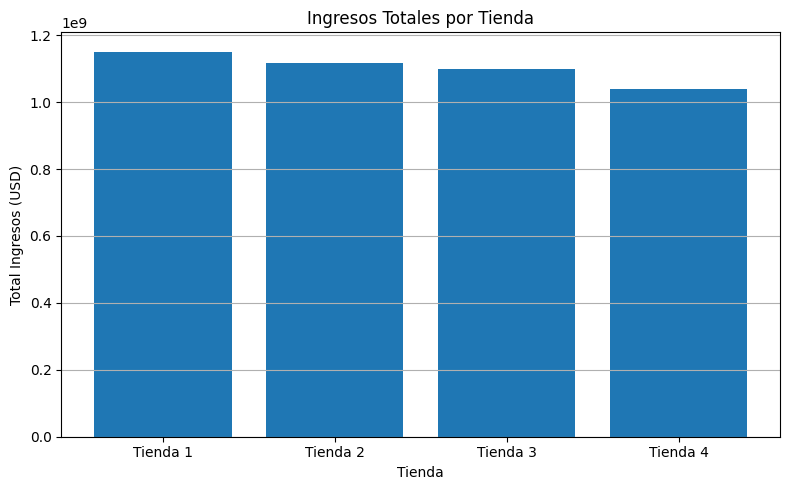

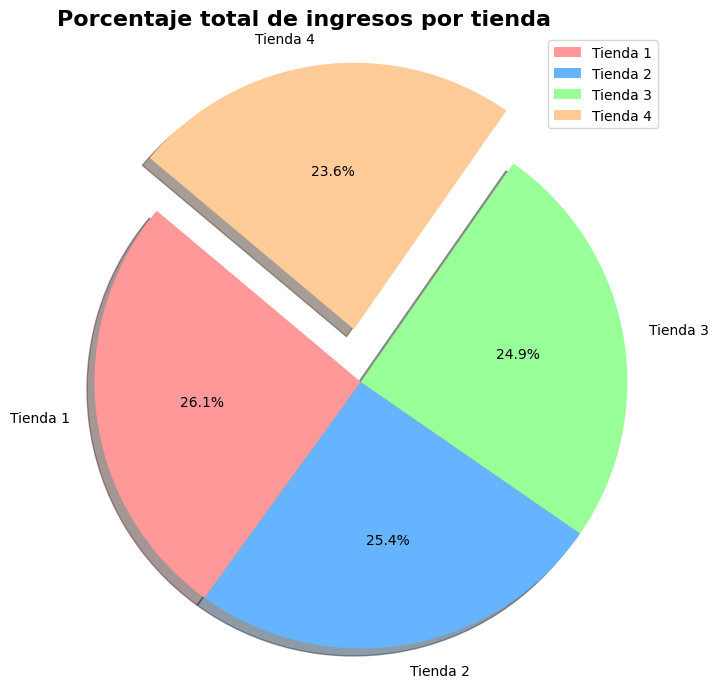

In [281]:
import matplotlib.pyplot as plt

# Gráfica de los ingresos totales por 
plt.figure(figsize=(8,5))
plt.bar(revenue_per_store.keys(), revenue_per_store.values()) 
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
explode = [0.2 if value == min(revenue_per_store.values()) else 0 for value in revenue_per_store.values()]

plt.figure(figsize=(7,7))
plt.title('Porcentaje total de ingresos por tienda', fontsize=16, fontweight='bold', loc="left",)
plt.pie(revenue_per_store.values(), 
        labels=revenue_per_store.keys(), 
        shadow=True, 
        startangle=140,
        colors=colors,
        explode=explode,
        autopct="%1.1f%%"
        )
plt.legend()

plt.axis('equal')
plt.tight_layout()
plt.show()

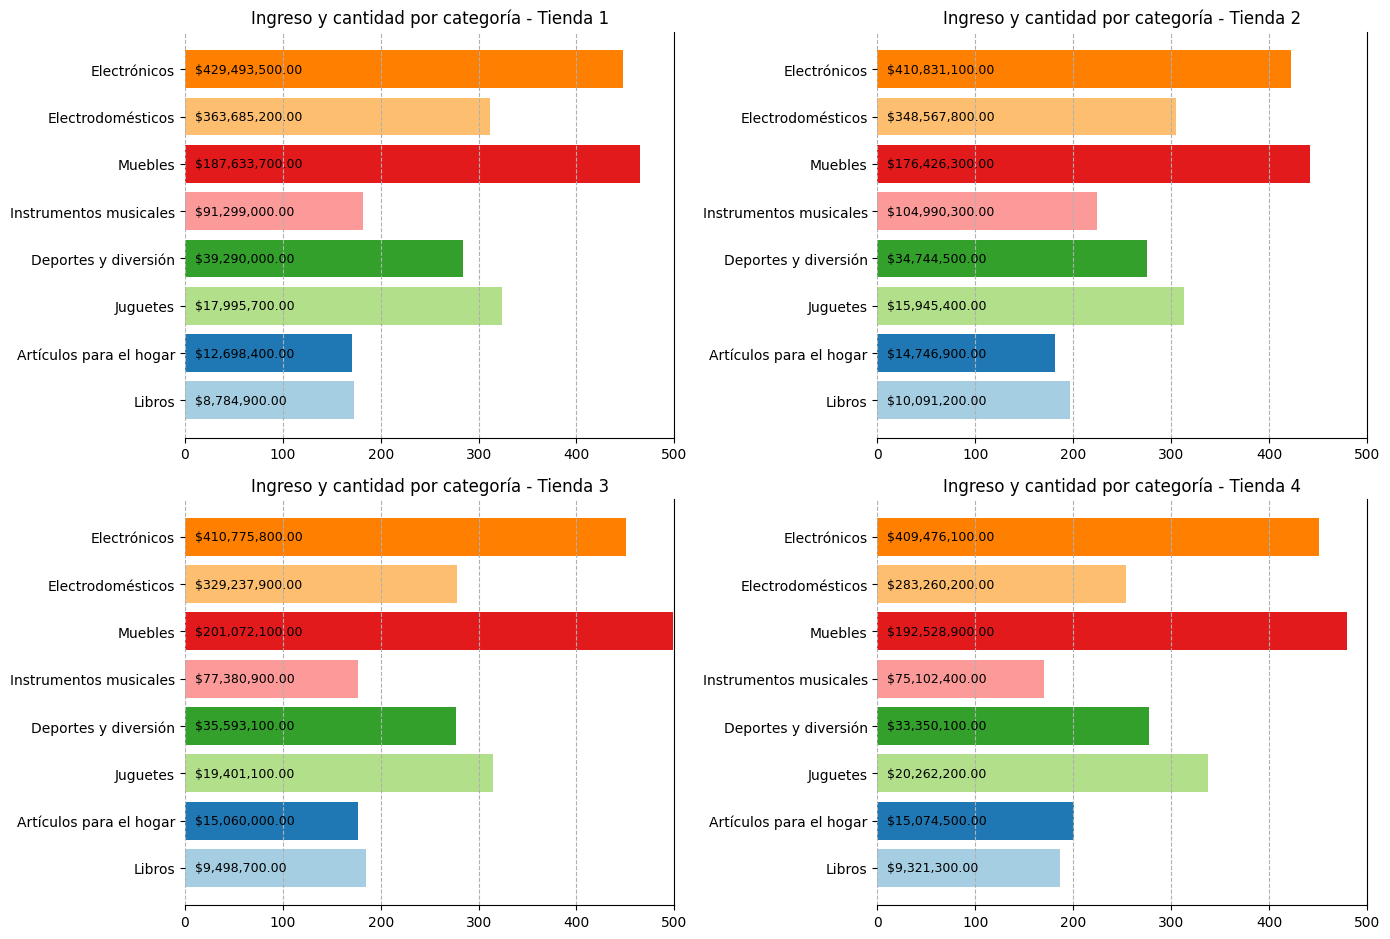

In [282]:
import matplotlib.pyplot as plt

tiendas = df_resume_by_category['Tienda'].unique()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()


for i,tienda in enumerate(tiendas):
    ax = axs[i]
    df_tienda = df_resume_by_category[df_resume_by_category['Tienda'] == tienda].sort_values(by='ingreso_total', ascending=True)
    
    categories = df_tienda['Categoría del Producto']
    counts = df_tienda['cantidad_total']
    revenue = df_tienda['ingreso_total']
    
    bars = ax.barh(categories, counts, color=plt.cm.Paired.colors)
    
    ax.set_title(f'Ingreso y cantidad por categoría - {tienda}')
    ax.spines[['top', 'left']].set_visible(False)
    ax.set_xlim(0, 500)
    
    for bar, ingreso in zip(bars, revenue):
        width = bar.get_width()
        ax.text(10, bar.get_y() + bar.get_height()/2,
                 f'${ingreso:,.2f}',
                 va='center', ha='left', fontsize=9)
    ax.grid(axis='x', linestyle='--')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Análisis del desempeño geográfico

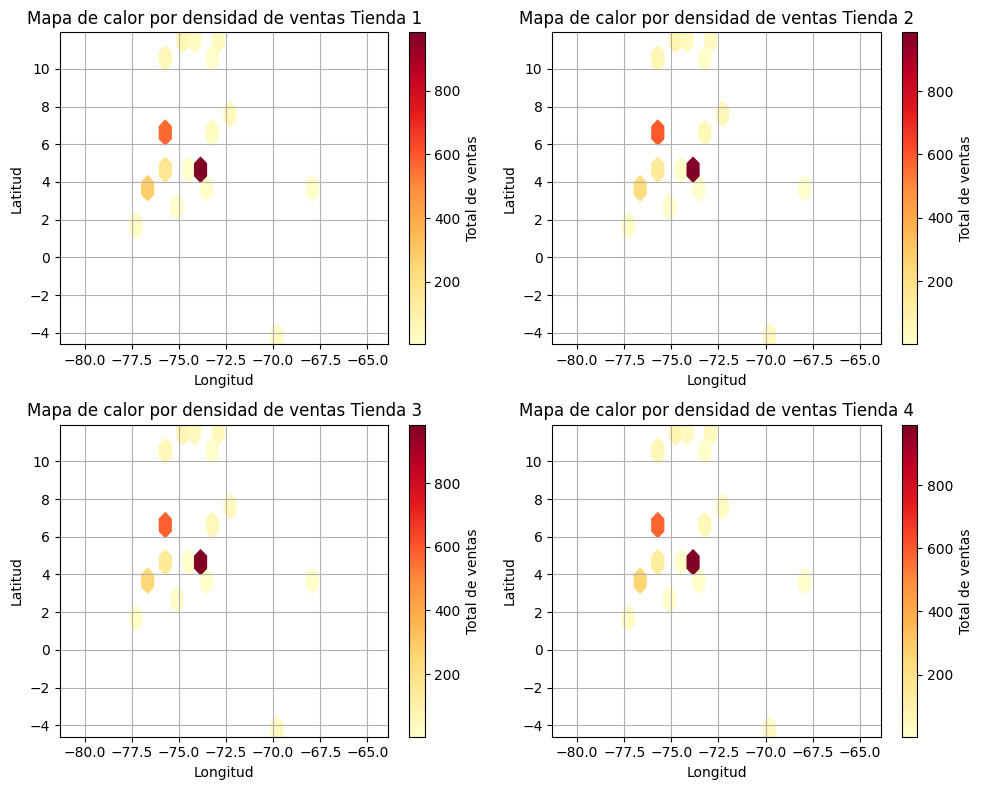

In [283]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
axs = ax.ravel()

for i,(key, store) in enumerate(df_tiendas.items()):
    counts = store.groupby(['lat', 'lon']).size().reset_index(name='count')
    ax = axs[i]
    # Mapa de calor
    hb = ax.hexbin(
        counts['lon'], counts['lat'],
        C=counts['count'],
        gridsize=15,       # Más alto = más resolución
        reduce_C_function=np.sum,  # Total de ventas por celda
        cmap='YlOrRd'
    )
    fig.colorbar(hb, ax=ax, label='Total de ventas')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.set_title('Mapa de calor por densidad de ventas ' + key)
    ax.grid(True)
    ax.axis('equal')
# Ajustando espacio entre subplots
plt.tight_layout()
plt.show()



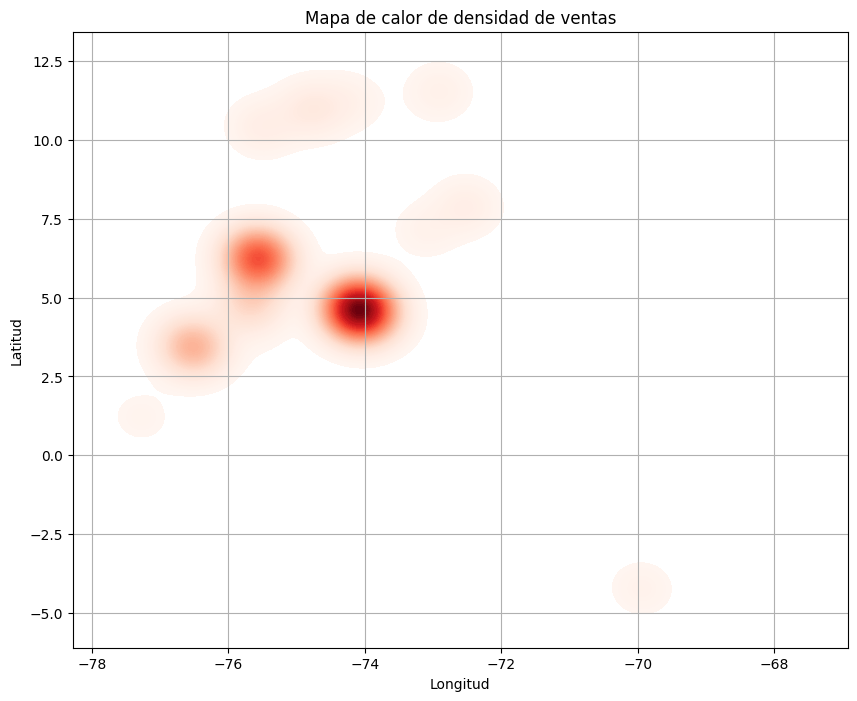

In [289]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=df_tiendas['Tienda 1']["lon"], y=df_tiendas['Tienda 1']["lat"],
    cmap="Reds", fill=True, thresh=0.05, levels=100
)
# plt.scatter(df_tiendas['Tienda 1']["lon"], df_tiendas['Tienda 1']["lat"], c='black', s=1, alpha=0.3)
plt.title("Mapa de calor de densidad de ventas")
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


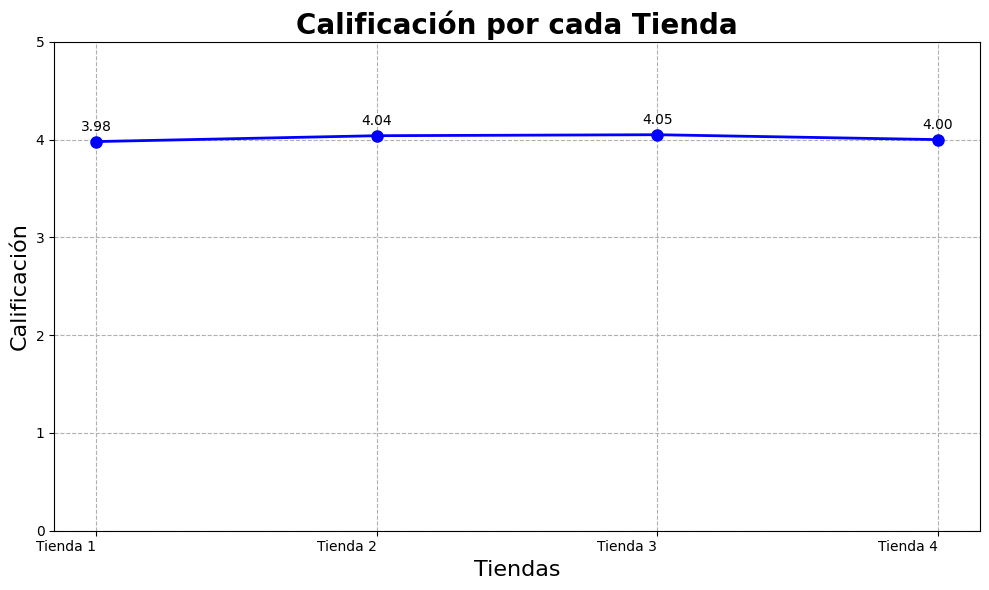

In [89]:
# GRÁFICA DE PUNTOS PARA MOSTRAR LA CALIFICACIÓN PROMEDIO DE CADA TIENDA
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Calificación por cada Tienda', fontsize=20, fontweight="bold")
plt.plot(average_rating_per_store.keys(), average_rating_per_store.values(), marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

for i, rating in enumerate(average_rating_per_store.values()):
    plt.text(list(average_rating_per_store.keys())[i], rating + 0.08, f'{rating:.2f}', ha='center', va='bottom')

plt.xlabel('Tiendas', fontsize=16)
plt.ylabel('Calificación', fontsize=16)
plt.ylim(0, 5)
plt.xticks(ha="right")
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()